In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data = pd.DataFrame()
data['Population'] = [47,48,85,20,19,13,72,16,50,60]

sample_without_replacement = data['Population'].sample(n=5, replace=False)
sample_with_replacement = data['Population'].sample(n=5, replace=True)

In [44]:
sample_without_replacement

0    47
3    20
8    50
4    19
2    85
Name: Population, dtype: int64

In [45]:
sample_with_replacement

0    47
3    20
1    48
6    72
5    13
Name: Population, dtype: int64

In [46]:
print("Population mean: ", data['Population'].mean())
print("Population std: ", data['Population'].std(ddof=0))
print("Population variance: ", data['Population'].var(ddof=0))
print("Population size: ", data['Population'].shape[0])

Population mean:  43.0
Population std:  23.912339910598458
Population variance:  571.8
Population size:  10


# Don't need ddof for mean

In [47]:
print("Sample Mean: ", sample_without_replacement.mean())
print("Sample Std: ", sample_without_replacement.std(ddof=1))
print("Sample Variance: ", sample_without_replacement.var(ddof=1))  
print("Sample Size: ", sample_without_replacement.shape[0])

Sample Mean:  44.2
Sample Std:  27.04995378923964
Sample Variance:  731.7
Sample Size:  5


# Sample Mean and Vairance
-> How close is it to the population stats

In [48]:
Estsample = pd.DataFrame(np.random.normal(10, 5, size=30)) 
# 30 samples from a normal distribution with mean 10 and std 5 taken from a normal distribution
print('sample mean: ', Estsample.mean())
print('sample std: ', Estsample.std(ddof=1))

sample mean:  0    11.282256
dtype: float64
sample std:  0    3.661086
dtype: float64


# Learning Lessons
1. sample[0] is used to access the first column of the dataframe
2. For plt, the xlabel and ylabel needs to be keyed as separate lines

In [49]:
meanlist = []
varlist = []
for i in range(1000):
    sample = pd.DataFrame(np.random.normal(10, 5, size=30)) 
    meanlist.append(sample[0].mean())
    varlist.append(sample[0].var(ddof=1))

collection = pd.DataFrame()
collection['mean'] = meanlist
collection['variance'] = varlist

# Save a list of 1000 means and variances after taking 30 samples from a normal distribution with mean 10 and std 5


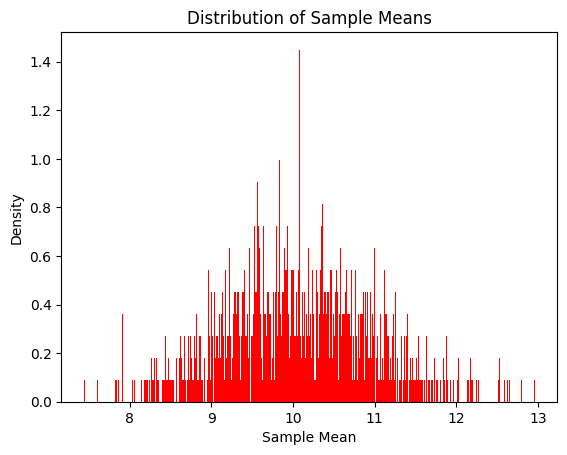

In [50]:
plt.hist(collection['mean'], bins=500, density=True, color='r')
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.show()

In [51]:
aapl = pd.read_csv('AAPL.csv',index_col=0, parse_dates=True)
aapl['logreturns'] = np.log(aapl['Close'].shift(-1))-np.log(aapl['Close'])

# Calculating 80% confidence interval for the mean of log returns
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)
sample_mean = aapl['logreturns'].mean()
sample_std = aapl['logreturns'].std(ddof=1)/(aapl.shape[0]**0.5)

In [52]:
interval_left = sample_mean + z_left * sample_std
interval_right = sample_mean + z_right * sample_std
print("80% confidence interval for the mean of log returns: ", (interval_left, interval_right))

80% confidence interval for the mean of log returns:  (np.float64(0.0003311673963183763), np.float64(0.001054779473696346))


# Understanding the Result
-> The result of the confidence interval is +ve
-> Likely that the returns are also +ve

# Video 4 Last Part of Module 3: Hypo Testing

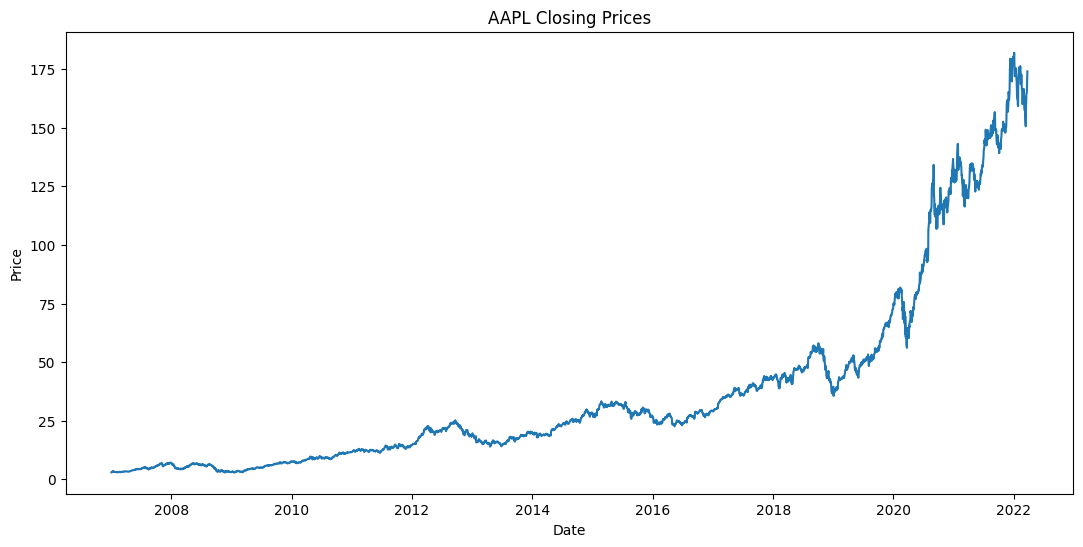

In [54]:
plt.figure(figsize=(13, 6))
plt.title('AAPL Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(aapl.loc['2007':,'Close'])
plt.show()